In [32]:
import pywindow as pw
from ase import io
import pygaps
import os
from ase import io
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt

In [33]:
def extract_crystals(directory, output_directory):
    files = os.listdir(directory)
    
    for file in files:
        atom = io.read(directory + f'/{file}')
        io.write(output_directory + f'/{file[:-4]}.pdb', atom)

    crystals = os.listdir(output_directory)

    pdb_files = [file for file in crystals if file.endswith('.pdb')]

    return pdb_files

def pore_size(dataframe, directory, pdb_files):
    for pdb in pdb_files:
        molsys = pw.MolecularSystem.load_file(directory + f"/{pdb}")
        mol = molsys.system_to_molecule()

        try:
            pore = mol.calculate_pore_volume_opt()
            dataframe.loc[pdb[:-4], 'Pore_Size'] = pore
        except ValueError:
            dataframe.loc[pdb[:-4], 'Pore_Size'] = None
            continue


In [34]:
directory = './MOCs'
output_directory = './MOCs_pdb'

# pdb = extract_crystals(directory, output_directory)

In [35]:
moc_list = pd.read_csv('MOCs.csv')
moc_list = list(moc_list['refcode'])

In [36]:
dataframe = pd.DataFrame(columns = ['Pore_Size'], index = moc_list)

In [37]:
moc_list = [file+'.pdb' for file in moc_list]

In [38]:
pore_size(dataframe, output_directory, moc_list)

In [39]:
dataframe.to_csv('mocs_pore_size.csv')

In [8]:
filtered_dataframe = dataframe[(dataframe['Pore_Size'] < 3.9) & (dataframe['Pore_Size'] > 2.9)]


In [11]:
filtered_dataframe

,Pore_Size
KIPYEP,3.730508
VIBPIH,3.294052
POZJOE,3.211992
BACXUB,3.412475
XUCTOF,2.958386
POBBOZ,3.89158
HEFJIP,3.435652
PECROF,3.536083
DAWSOL,3.852706
CUGKUK,3.51946


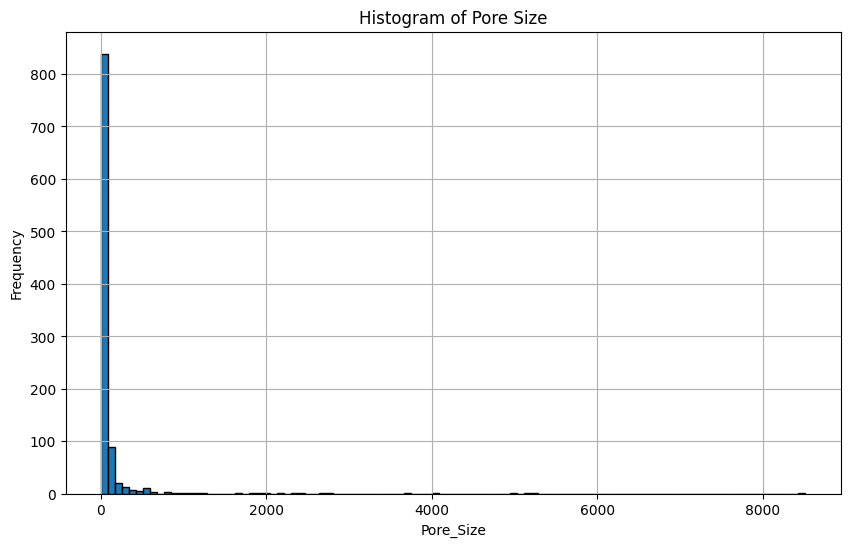

In [26]:
# dataframe = dataframe['Pore_Size'].dropna()

plt.figure(figsize=(10, 6))
plt.hist(dataframe, bins=100, edgecolor='black')
plt.title(f'Histogram of Pore Size')
plt.xlabel('Pore_Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
dataframe

ZOYDIC     21.666914
ZULHOF     24.416509
GUSRIX      1.012677
GUSRUJ      0.579607
GUSROD      0.249159
             ...    
CUYZON    102.564677
DUCZIM      7.834368
TEXRIZ      0.073346
UNITUI     56.858578
DOJNEY      55.26653
Name: Pore_Size, Length: 1014, dtype: object

In [12]:
filtered_dataframe.drop(['BIWHEV'], axis=0, inplace=True)

C:\Users\54284\AppData\Local\Temp\ipykernel_20404\4047196883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataframe.drop(['BIWHEV'], axis=0, inplace=True)


In [15]:
filtered_dataframe.to_csv('candidates.csv', index=True)

In [2]:
filtered_dataframe = pd.read_csv('candidates.csv')

In [3]:
filtered_dataframe

,Unnamed: 0,Pore_Size
0,KIPYEP,3.730508
1,VIBPIH,3.294052
2,POZJOE,3.211992
3,BACXUB,3.412475
4,XUCTOF,2.958386
5,POBBOZ,3.891580
6,HEFJIP,3.435652
7,PECROF,3.536083
8,DAWSOL,3.852706
9,CUGKUK,3.519460


In [18]:
crystals = list(filtered_dataframe['Unnamed: 0'])

In [19]:
crystals

['KIPYEP',
 'VIBPIH',
 'POZJOE',
 'BACXUB',
 'XUCTOF',
 'POBBOZ',
 'HEFJIP',
 'PECROF',
 'DAWSOL',
 'CUGKUK',
 'OCOVIN',
 'XOWNOM',
 'FUBMIY',
 'POVSUP',
 'LEJLAP',
 'SISBUU',
 'WEKPOV',
 'ENANAJ',
 'RAHYUU01',
 'RAHYUU',
 'VIQTIZ',
 'WICJAT',
 'BIMBEF']

In [20]:
source_directory = './cages_and_coordinates'
output_directory = './candidate'

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

for crystal in crystals:
    cif_file = f'{crystal}.cif'
    source_file = os.path.join(source_directory, cif_file)
    output_file_directory = os.path.join(output_directory, crystal)
    if not os.path.exists(output_file_directory):
        os.makedirs(output_file_directory)
    if os.path.isfile(source_file):
        shutil.copy(source_file, output_file_directory)
        print(f'Copy {source_file} to {output_file_directory}')

Copy ./cages_and_coordinates\KIPYEP.cif to ./candidate\KIPYEP
Copy ./cages_and_coordinates\VIBPIH.cif to ./candidate\VIBPIH
Copy ./cages_and_coordinates\POZJOE.cif to ./candidate\POZJOE
Copy ./cages_and_coordinates\BACXUB.cif to ./candidate\BACXUB
Copy ./cages_and_coordinates\XUCTOF.cif to ./candidate\XUCTOF
Copy ./cages_and_coordinates\POBBOZ.cif to ./candidate\POBBOZ
Copy ./cages_and_coordinates\HEFJIP.cif to ./candidate\HEFJIP
Copy ./cages_and_coordinates\PECROF.cif to ./candidate\PECROF
Copy ./cages_and_coordinates\DAWSOL.cif to ./candidate\DAWSOL
Copy ./cages_and_coordinates\CUGKUK.cif to ./candidate\CUGKUK
Copy ./cages_and_coordinates\OCOVIN.cif to ./candidate\OCOVIN
Copy ./cages_and_coordinates\XOWNOM.cif to ./candidate\XOWNOM
Copy ./cages_and_coordinates\FUBMIY.cif to ./candidate\FUBMIY
Copy ./cages_and_coordinates\POVSUP.cif to ./candidate\POVSUP
Copy ./cages_and_coordinates\LEJLAP.cif to ./candidate\LEJLAP
Copy ./cages_and_coordinates\SISBUU.cif to ./candidate\SISBUU
Copy ./c

In [33]:
for crystal in crystals:
    cif_file = f'{crystal}.cif'
    path = output_directory+f'/{crystal}'
    file_path = os.path.join(path, cif_file)
    atom = io.read(file_path)
    io.write(f'{crystal}.data', atom, format='lammps-data')

In [35]:
for crystal in crystals:
    data_file = f'{crystal}.data'
    source_file = os.path.join('./', data_file)
    output_file_directory = os.path.join(output_directory, crystal)
    if not os.path.exists(output_file_directory):
        os.makedirs(output_file_directory)
    if os.path.isfile(source_file):
        shutil.copy(source_file, output_file_directory)
        print(f'Copy {source_file} to {output_file_directory}')

Copy ./GUSRAP.data to ./candidates\GUSRAP
Copy ./KIPYEP.data to ./candidates\KIPYEP
Copy ./WAWWEZ.data to ./candidates\WAWWEZ
Copy ./VIBPIH.data to ./candidates\VIBPIH
Copy ./HABKAY.data to ./candidates\HABKAY
Copy ./OLINAZ.data to ./candidates\OLINAZ
Copy ./SAGZOQ.data to ./candidates\SAGZOQ
Copy ./POZJOE.data to ./candidates\POZJOE
Copy ./BALGOM.data to ./candidates\BALGOM
Copy ./BACXUB.data to ./candidates\BACXUB
Copy ./PUCHAX.data to ./candidates\PUCHAX
Copy ./QOVZAD.data to ./candidates\QOVZAD
Copy ./XUCTOF.data to ./candidates\XUCTOF
Copy ./POBBOZ.data to ./candidates\POBBOZ
Copy ./GASQIA.data to ./candidates\GASQIA
Copy ./HODVAA.data to ./candidates\HODVAA
Copy ./HEFJIP.data to ./candidates\HEFJIP
Copy ./PECROF.data to ./candidates\PECROF
Copy ./DAWSOL.data to ./candidates\DAWSOL
Copy ./CUGKUK.data to ./candidates\CUGKUK
Copy ./OCOVIN.data to ./candidates\OCOVIN
Copy ./DAWSUR.data to ./candidates\DAWSUR
Copy ./XOWNOM.data to ./candidates\XOWNOM
Copy ./SIZKET.data to ./candidates